## Ehsan Jahangirzadeh 
### 810194554
#### CA#3
#### Artificial Inteligence


In [218]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook',  spines=False, gridlines='--', figsize=(6, 4.5), ticks=True)

# reset default matplotlib rcParams
# jtplot.reset()

In [219]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Cleaning the texts
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from math import log, sqrt

%matplotlib inline

In [220]:
message=pd.read_csv('train_test.csv')
message.head()

type                                               text
0   ham  Fighting with the world is easy, u either win ...
1   ham                              When can Ì_ come out?
2   ham                            Check with nuerologist.
3   ham           Lolnice. I went from a fish to ..water.?
4  spam  +123 Congratulations - in this week's competit...

In [221]:
message.describe()

type                    text
count   5072                    5072
unique     2                    4728
top      ham  Sorry, I'll call later
freq    4396                      26

In [222]:
message.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4396   4132                             Sorry, I'll call later   26
spam   676    596  FREE for 1st week! No1 Nokia tone 4 ur mob eve...    3

In [223]:
message['length']=message['text'].apply(len)
message.head()

type                                               text  length
0   ham  Fighting with the world is easy, u either win ...     149
1   ham                              When can Ì_ come out?      21
2   ham                            Check with nuerologist.      23
3   ham           Lolnice. I went from a fish to ..water.?      40
4  spam  +123 Congratulations - in this week's competit...     170

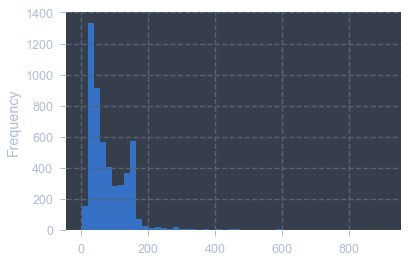

In [224]:
message['length'].plot(bins=50,kind='hist')

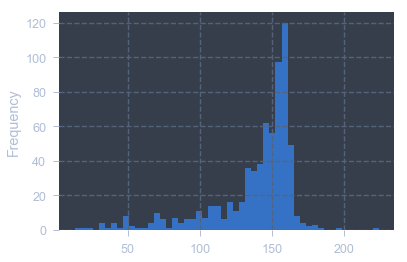

In [225]:
message[message['type'] == 'spam']['length'].plot(bins=50,kind='hist')

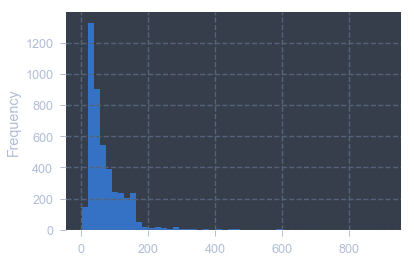

In [226]:
message[message['type'] == 'ham']['length'].plot(bins=50,kind='hist')

In [227]:
message.length.describe()

count    5072.000000
mean       79.915024
std        59.976398
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [228]:
message[message['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [229]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    review = re.sub('[^a-zA-Z]', ' ', nopunc)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    return review

In [230]:
message['processed_text'] = message['text'].apply(text_process)
message.head(5)

type                                               text  length  \
0   ham  Fighting with the world is easy, u either win ...     149   
1   ham                              When can Ì_ come out?      21   
2   ham                            Check with nuerologist.      23   
3   ham           Lolnice. I went from a fish to ..water.?      40   
4  spam  +123 Congratulations - in this week's competit...     170   

                                      processed_text  
0  [fight, world, easi, u, either, win, lose, bt,...  
1                                             [come]  
2                               [check, nuerologist]  
3                        [lolnic, went, fish, water]  
4  [congratul, week, competit, draw, u, prize, cl...

In [231]:
totalMessages = message['processed_text'].shape[0]
trainIndex, testIndex = list(), list()
for i in range(message.shape[0]):
    if np.random.uniform(0, 1) < .75:
        trainIndex += [i]
    else:
        testIndex += [i]

trainData = message.loc[trainIndex]
testData = message.loc[testIndex]

In [232]:
trainData.reset_index(inplace=True)
trainData.drop(['index'], axis=1, inplace=True)
testData.reset_index(inplace=True)
testData.drop(['index'], axis=1, inplace=True)
trainData.head()

type                                               text  length  \
0   ham                              When can Ì_ come out?      21   
1   ham                            Check with nuerologist.      23   
2   ham           Lolnice. I went from a fish to ..water.?      40   
3  spam  +123 Congratulations - in this week's competit...     170   
4   ham  No it's waiting in e car dat's bored wat. Cos ...     117   

                                      processed_text  
0                                             [come]  
1                               [check, nuerologist]  
2                        [lolnic, went, fish, water]  
3  [congratul, week, competit, draw, u, prize, cl...  
4  [wait, e, car, dat, bore, wat, co, wait, outsi...

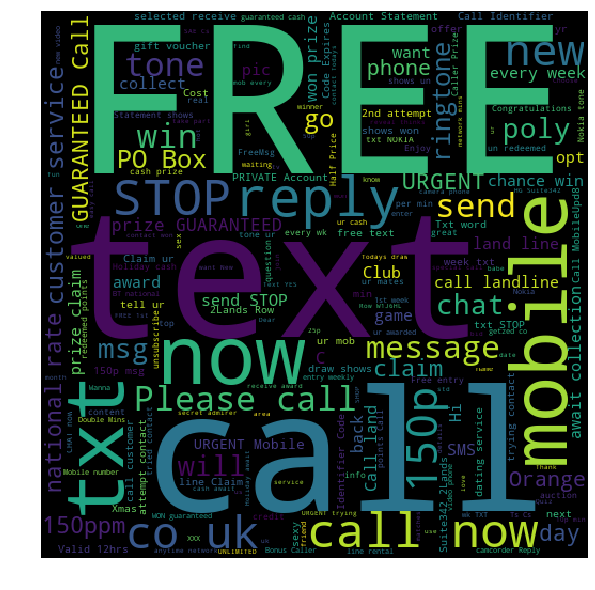

In [233]:
spam_words = ' '.join(message[message['type'] == 'spam']['text'])
spam_wc = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

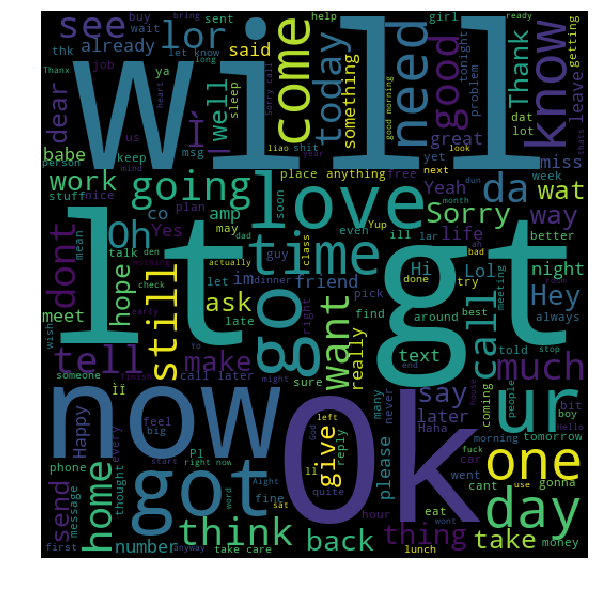

In [234]:
ham_words = ' '.join(message[message['type'] == 'ham']['text'])
ham_wc = WordCloud(width=512, height=512).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [235]:
def build_counts(message_list):
    cnt_spam = Counter()
    cnt_ham = Counter()
    
    spams = message_list[message_list['type'] == 'spam']
    hams = message_list[message_list['type'] == 'ham']
    
    for spam in spams['processed_text']:
        for word in spam:
            cnt_ham[word] += 1
    for ham in hams['processed_text']:
        for word in ham:
            cnt_spam[word] += 1
    return cnt_spam, cnt_ham

cnt_spam, cnt_ham = build_counts(trainData)

In [236]:
"""
An implementation of Jurafsky's MN Bayes Network
algorithm.
"""
def train(message_list, cnt_spam, cnt_ham):
    ham_count = len(message_list[message_list['type'] == 'ham'])
    spam_count = len(message_list[message_list['type'] == 'spam'])
    doc_count = ham_count + spam_count
    
    features = {}
    features['spamFeatures'] = {}
    features['hamFeatures'] = {}
    
    
    # Gathering a priori probabilities by class
    priorLogHam = log((ham_count + 1) / doc_count)
    priorLogSpam = log((spam_count+ 1) / doc_count)

    for word, count in cnt_ham.items():
        features['hamFeatures'][word] = log((count + 1) \
                                        /(ham_count + doc_count))
        
    for word, count in cnt_spam.items():
        features['spamFeatures'][word] = log((count + 1) \
                                        /(spam_count + doc_count))
        
    return features, priorLogHam, priorLogSpam, ham_count, spam_count


features, priorLogHam, priorLogSpam, ham_count, spam_count = train(trainData, cnt_spam, cnt_ham)

In [237]:
print(priorLogHam, priorLogSpam)

-0.13756154958323022 -2.0476276734346386


In [238]:
def test(document, priorLogHam, priorLogSpam, ham_count, spam_count):
    doc_count = ham_count + spam_count
    val = {}
    val['hamFeatures'] = priorLogHam
    val['spamFeatures'] = priorLogSpam

    for feature in features:
        for word in document:
            if word in features[feature]:
                val[feature] += features[feature][word]

    if val['hamFeatures'] > val['spamFeatures']:
        return ('ham', val['hamFeatures'])
    elif val['spamFeatures'] > val['hamFeatures']:
        return ('spam', val['spamFeatures'])
    return ('ham', val['hamFeatures'])


In [239]:
def do_test(tokenized_message):
    return test(tokenized_message, priorLogHam, priorLogSpam, ham_count, spam_count)[0]

In [240]:
testData['nb_classification'] = testData['processed_text'].apply(do_test)
testData.head(30)

type                                               text  length  \
0    ham  Fighting with the world is easy, u either win ...     149   
1    ham  8 at the latest, g's still there if you can sc...      99   
2    ham                          No..jst change tat only..      25   
3   spam  Boltblue tones for 150p Reply POLY# or MONO# e...     146   
4   spam  Your credits have been topped up for http://ww...      89   
5    ham  Usually the person is unconscious that's in ch...     117   
6    ham                         Shall i come to get pickle      26   
7    ham  What Today-sunday..sunday is holiday..so no wo...      50   
8   spam  from www.Applausestore.com MonthlySubscription...      96   
9    ham    4 oclock at mine. Just to bash out a flat plan.      47   
10   ham                             Wait  &lt;#&gt;  min..      22   
11   ham  Sure, if I get an acknowledgement from you tha...     120   
12   ham                   Thanx 4 e brownie it's v nice...      32   
13  spam  GENT! We are trying to contact you. Last weeke...     159   
14   ham  So anyways, you can just go to your gym or wha...     142   
15   ham  Yar lor wait 4 my mum 2 finish sch then have l...     134   
16  spam  You have won ?1,000 cash or a ?2,000 prize! To...      69   
17   ham  Huh so early.. Then Ì_ having dinner outside i...      51   
18   ham     Ok anyway no need to change with what you said      46   
19   ham  my ex-wife was not able to have kids. Do you w...      63   
20   ham  Will do. Was exhausted on train this morning. ...      87   
21   ham             I'm going out to buy mum's present ar.      38   
22   ham                          For my family happiness..      25   
23   ham  Nah it's straight, if you can just bring bud o...     123   
24  spam  New TEXTBUDDY Chat 2 horny guys in ur area 4 j...     130   
25   ham                                           Thank u!       8   
26   ham  Got it. Seventeen pounds for seven hundred ml ...      58   
27   ham               What will we do in the shower, baby?      36   
28   ham  I had askd u a question some hours before. Its...      53   
29   ham   said kiss, kiss, i can't do the sound effects...     133   

                                       processed_text nb_classification  
0   [fight, world, easi, u, either, win, lose, bt,...              spam  
1   [latest, gs, still, scroung, ammo, want, give,...               ham  
2                                 [nojst, chang, tat]               ham  
3   [boltblu, tone, p, repli, poli, mono, eg, poli...               ham  
4   [credit, top, httpwwwbubbletextcom, renew, pin...               ham  
5   [usual, person, unconsci, that, children, adul...               ham  
6                           [shall, come, get, pickl]               ham  
7                [todaysundaysunday, holidayso, work]               ham  
8   [wwwapplausestorecom, monthlysubscript, pmsg, ...              spam  
9                    [oclock, mine, bash, flat, plan]               ham  
10                                  [wait, ltgt, min]               ham  
11  [sure, get, acknowledg, astoundingli, tactless...               ham  
12                        [thanx, e, browni, v, nice]               ham  
13  [gent, tri, contact, last, weekend, draw, show...              spam  
14  [anyway, go, gym, whatev, love, smile, hope, o...              spam  
15  [yar, lor, wait, mum, finish, sch, lunch, lor,...               ham  
16                         [cash, prize, claim, call]              spam  
17                [huh, earli, dinner, outsid, izzit]               ham  
18                    [ok, anyway, need, chang, said]               ham  
19             [exwif, abl, kid, want, kid, one, day]               ham  
20  [exhaust, train, morn, much, wine, pie, sleep,...               ham  
21                    [im, go, buy, mum, present, ar]               ham  
22                                    [famili, happi]               ham  
23  [nah, straight, bring,

In [241]:
def check_correctness(row):
    return 1 if row['type'] == row['nb_classification'] else 0

testData['correct'] = testData[['type', 'nb_classification']].apply(check_correctness, axis=1)
testData.head(10)

type                                               text  length  \
0   ham  Fighting with the world is easy, u either win ...     149   
1   ham  8 at the latest, g's still there if you can sc...      99   
2   ham                          No..jst change tat only..      25   
3  spam  Boltblue tones for 150p Reply POLY# or MONO# e...     146   
4  spam  Your credits have been topped up for http://ww...      89   
5   ham  Usually the person is unconscious that's in ch...     117   
6   ham                         Shall i come to get pickle      26   
7   ham  What Today-sunday..sunday is holiday..so no wo...      50   
8  spam  from www.Applausestore.com MonthlySubscription...      96   
9   ham    4 oclock at mine. Just to bash out a flat plan.      47   

                                      processed_text nb_classification  \
0  [fight, world, easi, u, either, win, lose, bt,...              spam   
1  [latest, gs, still, scroung, ammo, want, give,...               ham   
2                                [nojst, chang, tat]               ham   
3  [boltblu, tone, p, repli, poli, mono, eg, poli...               ham   
4  [credit, top, httpwwwbubbletextcom, renew, pin...               ham   
5  [usual, person, unconsci, that, children, adul...               ham   
6                          [shall, come, get, pickl]               ham   
7               [todaysundaysunday, holidayso, work]               ham   
8  [wwwapplausestorecom, monthlysubscript, pmsg, ...              spam   
9                   [oclock, mine, bash, flat, plan]               ham   

   correct  
0        0  
1        1  
2        1  
3        0  
4        0  
5        1  
6        1  
7        1  
8        1  
9        1

In [242]:
recall = testData[testData['type'] == 'spam']['correct'].sum() / len(testData[testData['type'] == 'spam'])
percision = testData[testData['nb_classification'] == 'spam']['correct'].sum() / len(testData[testData['nb_classification'] == 'spam'])
accuracy = testData['correct'].sum() / len(testData)
print('recall --> ', recall)
print('percision --> ', percision)
print('accuracy --> ', accuracy)

recall -->  0.8681318681318682
percision -->  0.3640552995391705
accuracy -->  0.7572815533980582


In [243]:
evaluate=pd.read_csv('evaluate.csv')
evaluate.head()

id                                               text
0   1  Go until jurong point, crazy.. Available only ...
1   2                      Ok lar... Joking wif u oni...
2   3  Free entry in 2 a wkly comp to win FA Cup fina...
3   4  U dun say so early hor... U c already then say...
4   5  Nah I don't think he goes to usf, he lives aro...

In [244]:
evaluate['processed_text'] = evaluate['text'].apply(text_process)
evaluate['type'] = evaluate['processed_text'].apply(do_test)
evaluate.head(30)

id                                               text  \
0    1  Go until jurong point, crazy.. Available only ...   
1    2                      Ok lar... Joking wif u oni...   
2    3  Free entry in 2 a wkly comp to win FA Cup fina...   
3    4  U dun say so early hor... U c already then say...   
4    5  Nah I don't think he goes to usf, he lives aro...   
5    6  FreeMsg Hey there darling it's been 3 week's n...   
6    7  Even my brother is not like to speak with me. ...   
7    8  As per your request 'Melle Melle (Oru Minnamin...   
8    9  WINNER!! As a valued network customer you have...   
9   10  Had your mobile 11 months or more? U R entitle...   
10  11  I'm gonna be home soon and i don't want to tal...   
11  12  SIX chances to win CASH! From 100 to 20,000 po...   
12  13  URGENT! You have won a 1 week FREE membership ...   
13  14  I've been searching for the right words to tha...   
14  15                I HAVE A DATE ON SUNDAY WITH WILL!!   
15  16  XXXMobileMovieClub: To use your credit, click ...   
16  17                         Oh k...i'm watching here:)   
17  18  Eh u remember how 2 spell his name... Yes i di...   
18  19  Fine if thatåÕs the way u feel. ThatåÕs the wa...   
19  20  England v Macedonia - dont miss the goals/team...   
20  21          Is that seriously how you spell his name?   
21  22  I‰Û÷m going to try for 2 months ha ha only joking   
22  23  So Ì_ pay first lar... Then when is da stock c...   
23  24  Aft i finish my lunch then i go str down lor. ...   
24  25  Ffffffffff. Alright no way I can meet up with ...   
25  26  Just forced myself to eat a slice. I'm really ...   
26  27                     Lol your always so convincing.   
27  28  Did you catch the bus ? Are you frying an egg ...   
28  29  I'm back &amp; we're packing the car now, I'll...   
29  30  Ahhh. Work. I vaguely remember that! What does...   

                                       processed_text  type  
0   [go, jurong, point, crazi, avail, bugi, n, gre...  spam  
1                        [ok, lar, joke, wif, u, oni]   ham  
2   [free, entri, wkli, comp, win, fa, cup, final,...  spam  
3       [u, dun, say, earli, hor, u, c, alreadi, say]   ham  
4   [nah, dont, think, goe, usf, live, around, tho...   ham  
5   [freemsg, hey, darl, week, word, back, id, lik...  spam  
6   [even, brother, like, speak, treat, like, aid,...   ham  
7   [per, request, mell, mell, oru, minnaminungint...   ham  
8   [winner, valu, network, custom, select, receiv...  spam  
9   [mobil, month, u, r, entitl, updat, latest, co...  spam  
10  [im, gonna, home, soon, dont, want, talk, stuf...  spam  
11  [six, chanc, win, cash, pound, txt, csh, send,...  spam  
12  [urgent, week, free, membership, prize, jackpo...  spam  
13  [ive, search, right, word, thank, breather, pr...  spam  
14                                     [date, sunday]   ham  
15  [xxxmobilemovieclub, use, credit, click, wap, ...  spam  
16                                   [oh, kim, watch]   ham  
17  [eh, u, rememb, spell, name, ye, v, naughti, m...   ham  
18                 [fine, way, u, feel, way, gota, b]   ham  
19  [england, v, macedonia, dont, miss, goalsteam,...  spam  
20                             [serious, spell, name]   ham  
21                     [go, tri, month, ha, ha, joke]   ham  
22                [pay, first, lar, da, stock, comin]   ham  
23  [aft, finish, lunch, go, str, lor, ard, smth, ...   ham  
24           [ffffffffff, alright, way, meet, sooner]   ham  
25  [forc, eat, slice, im, realli, hungri, tho, su...   ham  
26                              [lol, alway, convinc]   ham  
27  [catch, bu, fri, egg, make, tea, eat, mom, lef...   ham  
28  [im, back, amp, pack, car, ill, let, know, the...  spam  
29        [ahhh, work, vagu, rememb, feel, like, lol]   ham

In [245]:
evaluate['type'].to_csv('output.csv')